In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
Base = automap_base()

In [8]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables


In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)
first_measurement = session.query(Measurement).first()
first_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb2e174e110>,
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0}

In [12]:
first_station = session.query(Station).first()
first_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb2e1757150>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

precp_day = [Measurement.date,func.sum(Measurement.prcp)]

daily_total_precp = session.query(*precp_day).\
    filter(func.strftime("%Y,%m,%d", Measurement.date) >= "2016,08,23").\
        group_by(Measurement.date).\
    order_by(Measurement.date).all()

daily_total_precp


[('2016-08-23', 2.71),
 ('2016-08-24', 9.329999999999998),
 ('2016-08-25', 0.54),
 ('2016-08-26', 0.09999999999999999),
 ('2016-08-27', 0.31999999999999995),
 ('2016-08-28', 3.0999999999999996),
 ('2016-08-29', 1.46),
 ('2016-08-30', 0.07),
 ('2016-08-31', 3.1799999999999997),
 ('2016-09-01', 0.03),
 ('2016-09-02', 0.25),
 ('2016-09-03', 1.27),
 ('2016-09-04', 1.3800000000000001),
 ('2016-09-05', 0.33999999999999997),
 ('2016-09-06', 1.23),
 ('2016-09-07', 2.0),
 ('2016-09-08', 0.4600000000000001),
 ('2016-09-09', 1.0699999999999998),
 ('2016-09-10', 1.4),
 ('2016-09-11', 1.25),
 ('2016-09-12', 1.54),
 ('2016-09-13', 2.71),
 ('2016-09-14', 14.280000000000001),
 ('2016-09-15', 4.96),
 ('2016-09-16', 0.8200000000000001),
 ('2016-09-17', 0.6799999999999999),
 ('2016-09-18', 0.53),
 ('2016-09-19', 0.32),
 ('2016-09-20', 1.03),
 ('2016-09-21', 1.17),
 ('2016-09-22', 1.44),
 ('2016-09-23', 1.57),
 ('2016-09-24', 0.28),
 ('2016-09-25', 0.09),
 ('2016-09-26', 1.67),
 ('2016-09-27', 1.359999999

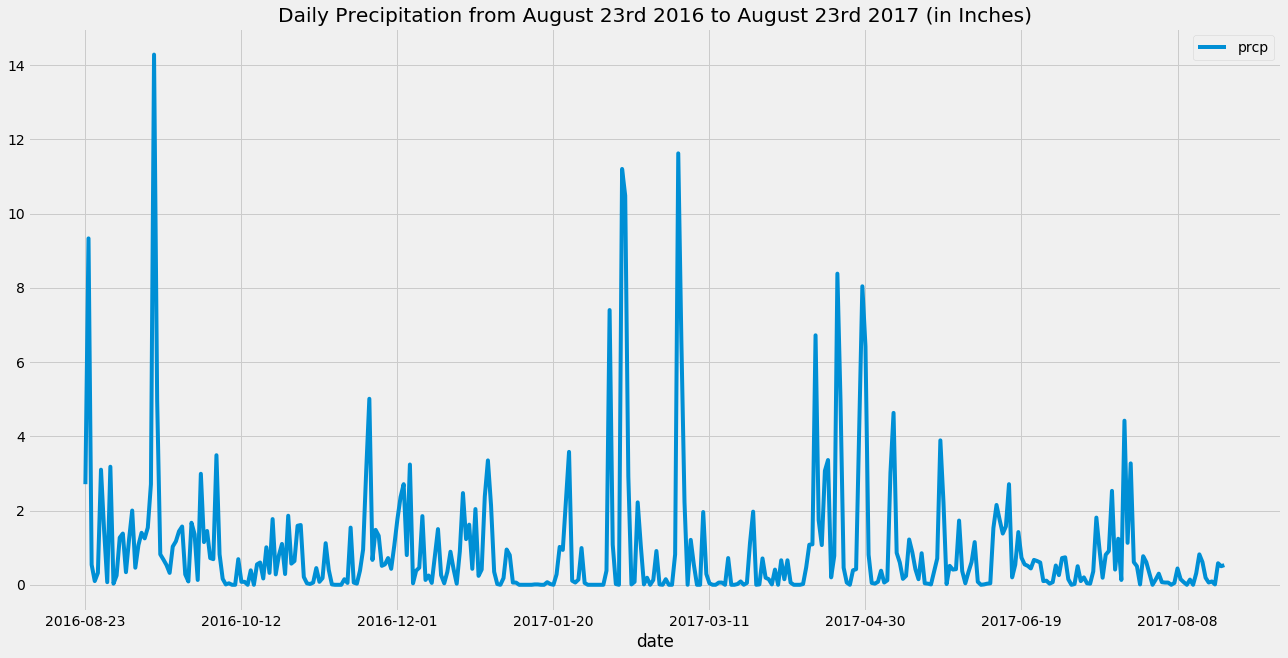

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
prep_df = pd.DataFrame(daily_total_precp, columns = ['date','prcp'])
prep_df.set_index('date', inplace=True)
#prep_df.plot.bar(figsize=(20,10))
prep_df.plot(title = 'Daily Precipitation from August 23rd 2016 to August 23rd 2017 (in Inches)',figsize=(20,10))
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prep_df.describe()

,prcp
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


In [17]:
# Design a query to show how many stations are available in this dataset?

full_table = [Measurement.prcp, Measurement.id, Measurement.station, Measurement.tobs, Measurement.date, Station.station, Station.latitude, Station.id, Station.elevation, Station.name, Station.longitude]
station_count = session.query(*full_table).filter(Measurement.station == Station.station).\
    group_by(Station.station).count()

station_count

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stations = [Measurement.station,func.count(Measurement.id)]

total_stations = session.query(*stations).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
    

total_stations


[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

temp = [Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs) ]

min_temp = session.query(*temp).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
    

min_temp



[('USC00511918', 53.0, 87.0, 71.61596766043456),
 ('USC00513117', 59.0, 85.0, 72.68918420081211),
 ('USC00514830', 58.0, 85.0, 74.8732970027248),
 ('USC00516128', 58.0, 84.0, 70.91500765696784),
 ('USC00517948', 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 58.0, 83.0, 72.72407045009784),
 ('USC00519281', 54.0, 85.0, 71.66378066378067),
 ('USC00519397', 56.0, 87.0, 74.55323054331865),
 ('USC00519523', 56.0, 85.0, 74.5436493068565)]

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#USC00519281

temp_obser = [Measurement.date, func.avg(Measurement.tobs)]

daily_temp = session.query(*temp_obser).\
    filter(Measurement.station == "USC00519281").\
    filter(func.strftime("%Y,%m,%d", Measurement.date) >= "2016,08,18").\
        group_by(Measurement.date).\
    order_by(Measurement.date).all()

daily_temp

#filter(func.strftime("%Y,%m,%d", Measurement.date) >= "2016,08,23")


[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

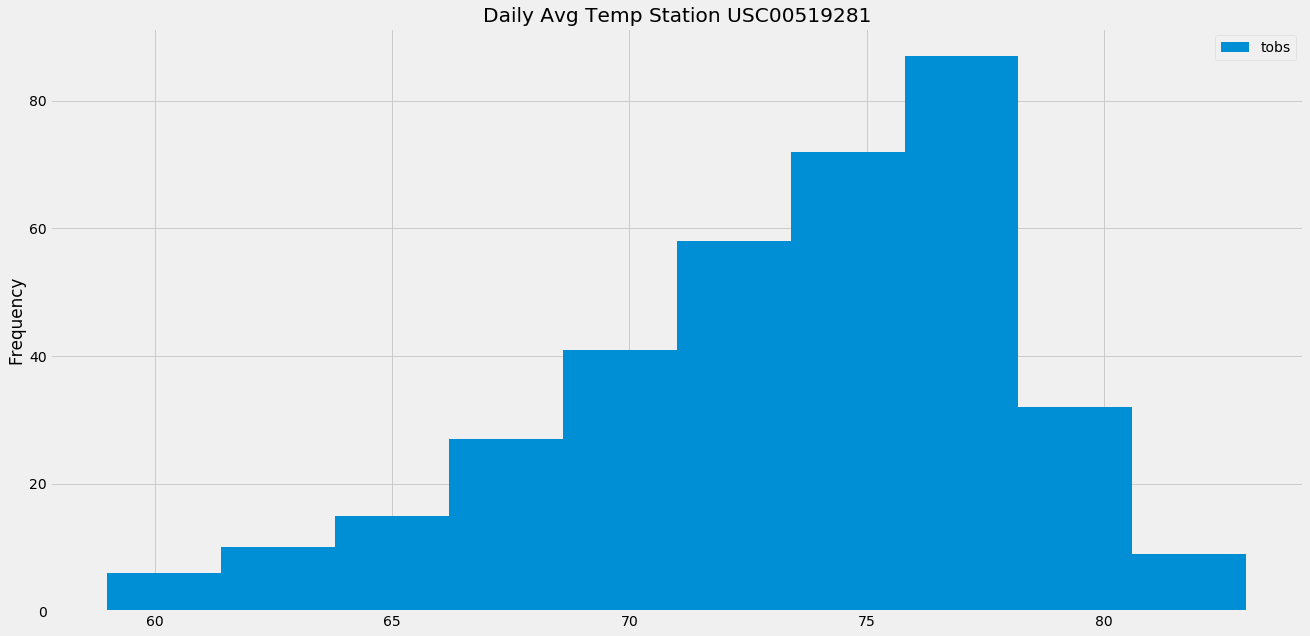

In [21]:
temp_df = pd.DataFrame(daily_temp, columns = ['date', 'tobs'])
temp_df.set_index('date', inplace=True)
temp_df.plot.hist(title = 'Daily Avg Temp Station USC00519281', figsize = (20,10))
#plt.figure(figsize = (20,20))
plt.show()